### Necessary Libraries

In [1]:
%pip install numpy pandas matplotlib seaborn scipy selenium webdriver_manager scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans

# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [3]:
import os
import subprocess

def run_script(script, output_file=None):
    if output_file is None or not os.path.exists(output_file):
        print(f"- running {script} to create {output_file}")
        process = subprocess.Popen(["python", script], 
                                stdout=subprocess.PIPE, 
                                stderr=subprocess.PIPE,
                                text=True)
        while True:
            output = process.stdout.readline()
            if output == '' and process.poll() is not None:
                break
            if output:
                print(output.strip())
                
        if process.poll() is None:
            process.terminate()

In [4]:
import os

if not os.path.exists('data'):
    os.makedirs('data')

### Scraping Data from [etherscan.io](https://etherscan.io/txs)

In order to collect data from the website, 'scrape.py' has been written. The workflow of this code is as follows:


#### 1. Initializing chrome driver

In [5]:
%%script echo (skipped)

chrome_service = Service(ChromeDriverManager().install())
chrome_options = Options()
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36")
chrome_options.add_argument("--headless")

dr = webdriver.Chrome(options=chrome_options, service=chrome_service)

Couldn't find program: 'echo'


#### 2. Extracting ten latest block numbers

In [6]:
%%script echo (skipped)

dr.get('https://etherscan.io/blocks')
blocks_page = dr.page_source

soup = BeautifulSoup(blocks_page, 'html.parser')
table = soup.find('table')

tbody = table.find('tbody')
trs = tbody.find_all('tr')

block_numbers = []
for tr in trs[:10]:
    td = tr.find('td')
    block_number = td.text.strip()
    block_numbers.append(block_number)

Couldn't find program: 'echo'


#### 3. Collecting all the transactions associated with those block numbers

In [7]:
%%script echo (skipped)

df = None
for block_number in block_numbers:
    p = 1
    while True:
        url = f'https://etherscan.io/txs?block={block_number}&p={p}'
        sleep(0.5)

        dr.get(url)
        page = dr.page_source
        
        soup = BeautifulSoup(page, 'html.parser')
        table = soup.find('table')
        
        if df is None:
            thead = table.find('thead')
            thead_titles = thead.find_all('th')
            titles = [table_title.text.strip() for table_title in thead_titles]
            df = pd.DataFrame(columns=titles)
        
        tbody = table.find('tbody')
        trs = tbody.find_all('tr')
        if len(trs) == 1: 
            break
        
        for tr in trs:
            tds = tr.find_all('td')
            tds = filter(lambda td: not (td.get('style') and 'display:none' in td.get('style')), tds)
            data = [td.text.strip() for td in tds]

            length = len(df)
            df.loc[length] = data
        p += 1
        
dr.quit()

Couldn't find program: 'echo'


#### 4. Closing the driver

In [8]:
%%script echo (skipped)

dr.quit()

Couldn't find program: 'echo'


#### 5. Saving data in `data.csv`

In [9]:
%%script echo (skipped)

df.to_csv('data/data.csv', index=False)

Couldn't find program: 'echo'


In addition in order to shorten the runtime, the function `run_script` is added to the notebook that only runs a script if a specific file does not exist.

In [10]:
run_script("scrape.py", "data/data.csv")

- running scrape.py to create data/data.csv
02:07:42: getting last 10 block numbers done:
['19386322', '19386321', '19386320', '19386319', '19386318', '19386317', '19386316', '19386315', '19386314', '19386313']
02:07:42: getting all transactions associated with block number 19386322
02:07:49: getting all transactions associated with block number 19386321
02:07:56: getting all transactions associated with block number 19386320
02:08:06: getting all transactions associated with block number 19386319
02:08:10: getting all transactions associated with block number 19386318
02:08:15: getting all transactions associated with block number 19386317
02:08:23: getting all transactions associated with block number 19386316
02:08:33: getting all transactions associated with block number 19386315
02:08:40: getting all transactions associated with block number 19386314
02:08:48: getting all transactions associated with block number 19386313
02:08:56: saving data in 'data/data.csv'


### Cleansing Data

In [11]:
df = pd.read_csv("data/data.csv", index_col=0)

columns_to_be_deleted = list(filter(lambda x: x not in ['Txn Fee', 'Value', 'Block', 'Method'], df.columns))

# 1. deleting unused columns
df.drop(columns_to_be_deleted, axis=1, inplace=True)

# 2. filtering data by whether their Value ends with 'ETH'
df = df[df['Value'].str.endswith('ETH')]

# 3. turning Txn Fee column into float
df['Txn Fee'] = pd.to_numeric(df['Txn Fee'], errors='coerce')

# 4. turning Value column into float
df['Value'] = df['Value'].str.replace(' ETH', '').str.replace(',', '').astype(float)

# 5. dropping duplicates
df.drop_duplicates(inplace=True)

# 6. dropping nan cells
df.dropna(subset=['Txn Fee', 'Value'], inplace=True)

# saving data in 'cleansed_data.csv'
df.to_csv('data/cleansed_data.csv', index=False)

## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

In [12]:
df = pd.read_csv('data/cleansed_data.csv', index_col=0)

In [13]:
df.head()

,Block,Value,Txn Fee
Method,,,
Transfer,19386322,0.028004,0.001168
Sell To Uniswap,19386322,0.000000,0.006347
Transfer,19386322,0.000000,0.002326
Transfer,19386322,0.009010,0.001189
Send Multi Sig,19386322,0.000000,0.005935


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, Transfer to Multicall
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Block    1625 non-null   int64  
 1   Value    1625 non-null   float64
 2   Txn Fee  1625 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 50.8+ KB


In [15]:
txn_fee_mean = df['Txn Fee'].mean()
txn_fee_std = df['Txn Fee'].std()

value_mean = df['Value'].mean()
value_std = df['Value'].std()

print(f"Txn Fee Mean: {txn_fee_mean}, Standard Deviation: {txn_fee_std}")
print(f"Value Mean: {value_mean}, Standard Deviation: {value_std}")

Txn Fee Mean: 0.005059634024615385, Standard Deviation: 0.01076051739714995
Value Mean: 0.628424691616, Standard Deviation: 8.61394923792629


### Adding Logarithm Columns

In [16]:
internal_tx_df = df[df['Value'] == 0]
external_tx_df = df[df['Value'] != 0]

In [17]:
internal_tx_df.loc[:, ['Log Txn Fee']] = np.log(internal_tx_df['Txn Fee'])
internal_tx_df.to_csv('data/internal_transfers.csv', index=False)

In [18]:
external_tx_df.loc[:, ['Log Txn Fee']] = np.log(external_tx_df['Txn Fee'])
external_tx_df.loc[:, ['Log Value']] = np.log(external_tx_df['Value'])
external_tx_df.to_csv('data/external_transfers.csv', index=False)

### Information About Dataframes

In [19]:
internal_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, Sell To Uniswap to Multicall
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Block        791 non-null    int64  
 1   Value        791 non-null    float64
 2   Txn Fee      791 non-null    float64
 3   Log Txn Fee  791 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 30.9+ KB


In [20]:
external_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, Transfer to Transfer
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Block        834 non-null    int64  
 1   Value        834 non-null    float64
 2   Txn Fee      834 non-null    float64
 3   Log Txn Fee  834 non-null    float64
 4   Log Value    834 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 39.1+ KB


### Histograms and the Fitted Normal Distribution

In [21]:
def plot_histogram_and_normal_dist(df, column, bin_size='auto', title=''):
    sns.histplot(df[column], bins=bin_size, kde=False, stat='density', label='Histogram')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, df[column].mean(), df[column].std())
    plt.plot(x, p, 'k', linewidth=2, label='Normal dist')
    title = title or f'Distribution of {column}'
    plt.title(title)
    plt.legend()

#### Internal Transfers

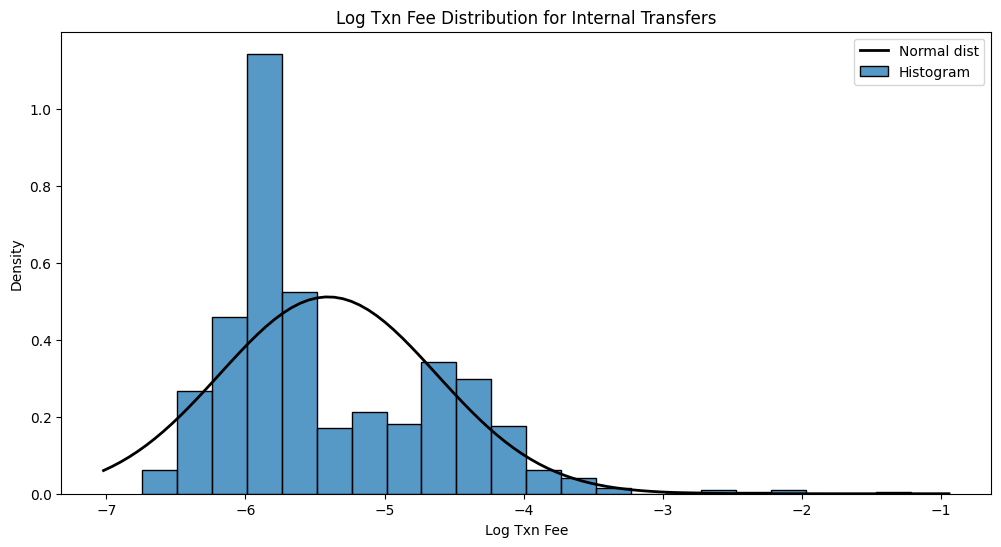

In [22]:
plt.figure(figsize=(12, 6))
plot_histogram_and_normal_dist(internal_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for Internal Transfers')
plt.show()

#### External Transfers

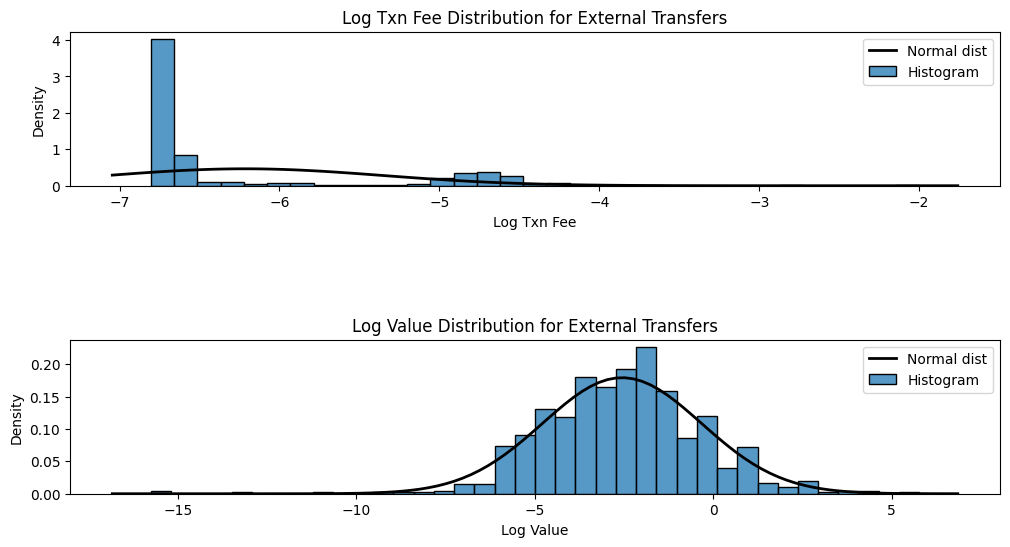

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_histogram_and_normal_dist(external_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for External Transfers')

plt.subplot(2, 1, 2)
plot_histogram_and_normal_dist(external_tx_df, 'Log Value', title='Log Value Distribution for External Transfers')

plt.subplots_adjust(hspace=1)
plt.show()

### Violin and Box Plots 

#### Internal Transfers

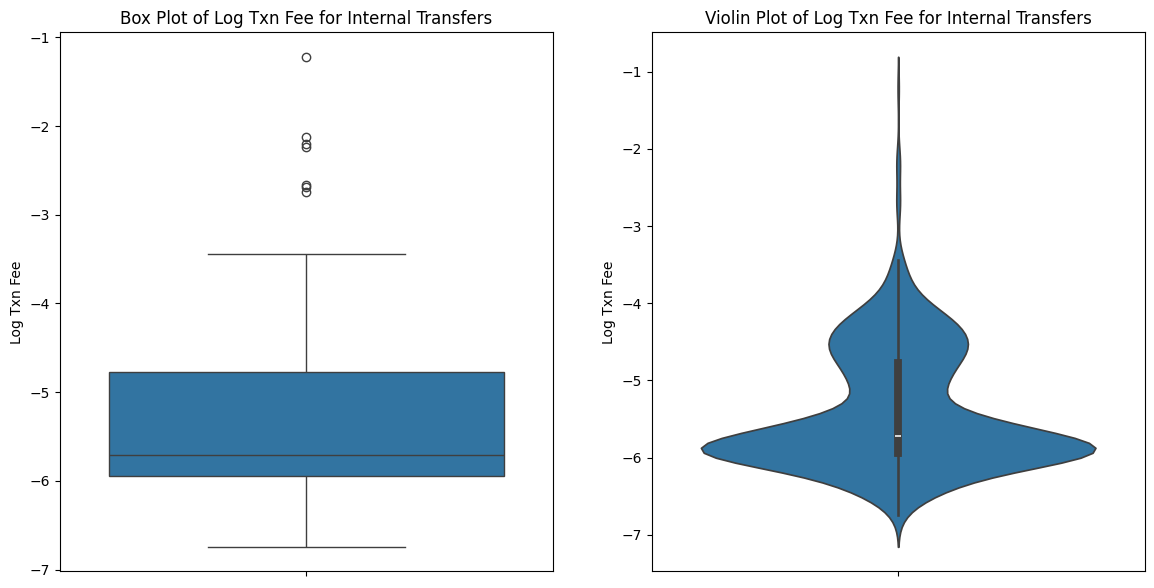

In [24]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=internal_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for Internal Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=internal_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for Internal Transfers')

plt.show()

#### External Transfers

##### Transaction Fee

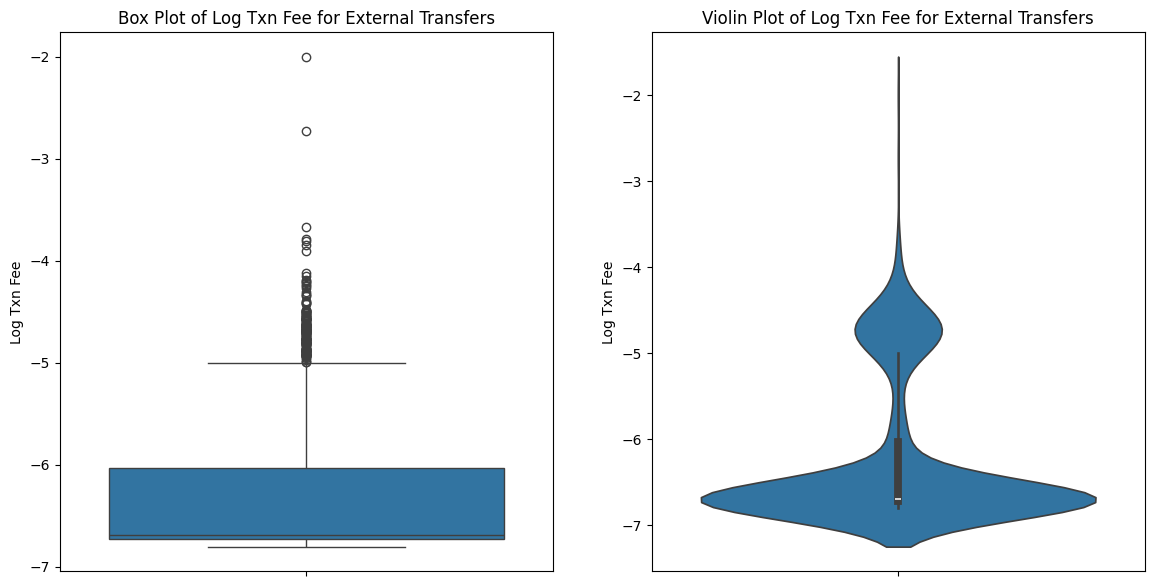

In [25]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=external_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=external_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

##### Value

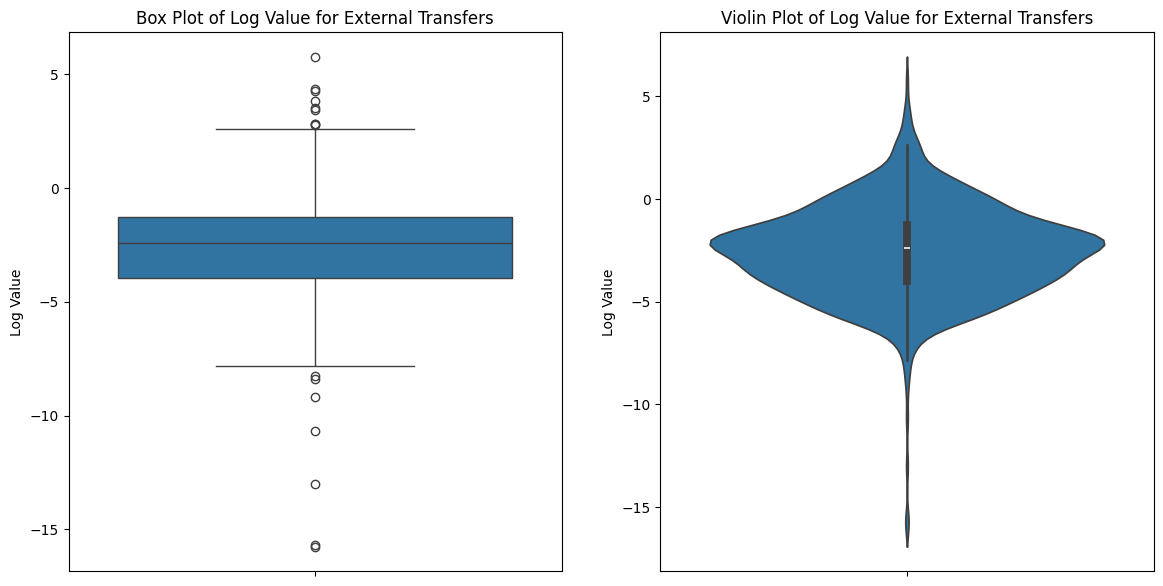

In [26]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=external_tx_df, y='Log Value')
plt.title('Box Plot of Log Value for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=external_tx_df, y='Log Value')
plt.title('Violin Plot of Log Value for External Transfers')

plt.show()

### Clustering External Transaction Fees Using K-Means

In [27]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5)
kmeans.fit(external_tx_df[['Log Txn Fee']].values)
external_tx_c0_df = external_tx_df[kmeans.labels_ == 0]
external_tx_c1_df = external_tx_df[kmeans.labels_ == 1]
external_tx_c0_df.to_csv('data/external_transfers_cluster0.csv', index=False)
external_tx_c1_df.to_csv('data/external_transfers_cluster1.csv', index=False)

In [28]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5)
kmeans.fit(internal_tx_df[['Log Txn Fee']].values)
internal_tx_c0_df = internal_tx_df[kmeans.labels_ == 0]
internal_tx_c1_df = internal_tx_df[kmeans.labels_ == 1]
internal_tx_c0_df.to_csv('data/internal_transfers_cluster0.csv', index=False)
internal_tx_c1_df.to_csv('data/internal_transfers_cluster1.csv', index=False)

### Violin and Box Plots After Clustering 

In [29]:
def plot_violin_and_box_plots_for_clusters(c0_df, c1_df, column, **options):
    
    ylim = options['ylim'] if 'ylim' in options.keys() else None
    titles = options['titles'] if 'titles' in options.keys() else []
    
    plt.subplot(2, 2, 1)
    sns.boxplot(data=c0_df, y=column)
    plt.title(titles[0])
    plt.ylim(ylim)

    plt.subplot(2, 2, 2)
    sns.violinplot(data=c0_df, y=column)
    plt.title(titles[1])
    plt.ylim(ylim)

    plt.subplot(2, 2, 3)
    sns.boxplot(data=c1_df, y=column)
    plt.title(titles[2])
    plt.ylim(ylim)

    plt.subplot(2, 2, 4)
    sns.violinplot(data=c1_df, y=column)
    plt.title(titles[3])
    plt.ylim(ylim)
    

#### Internal Transfers

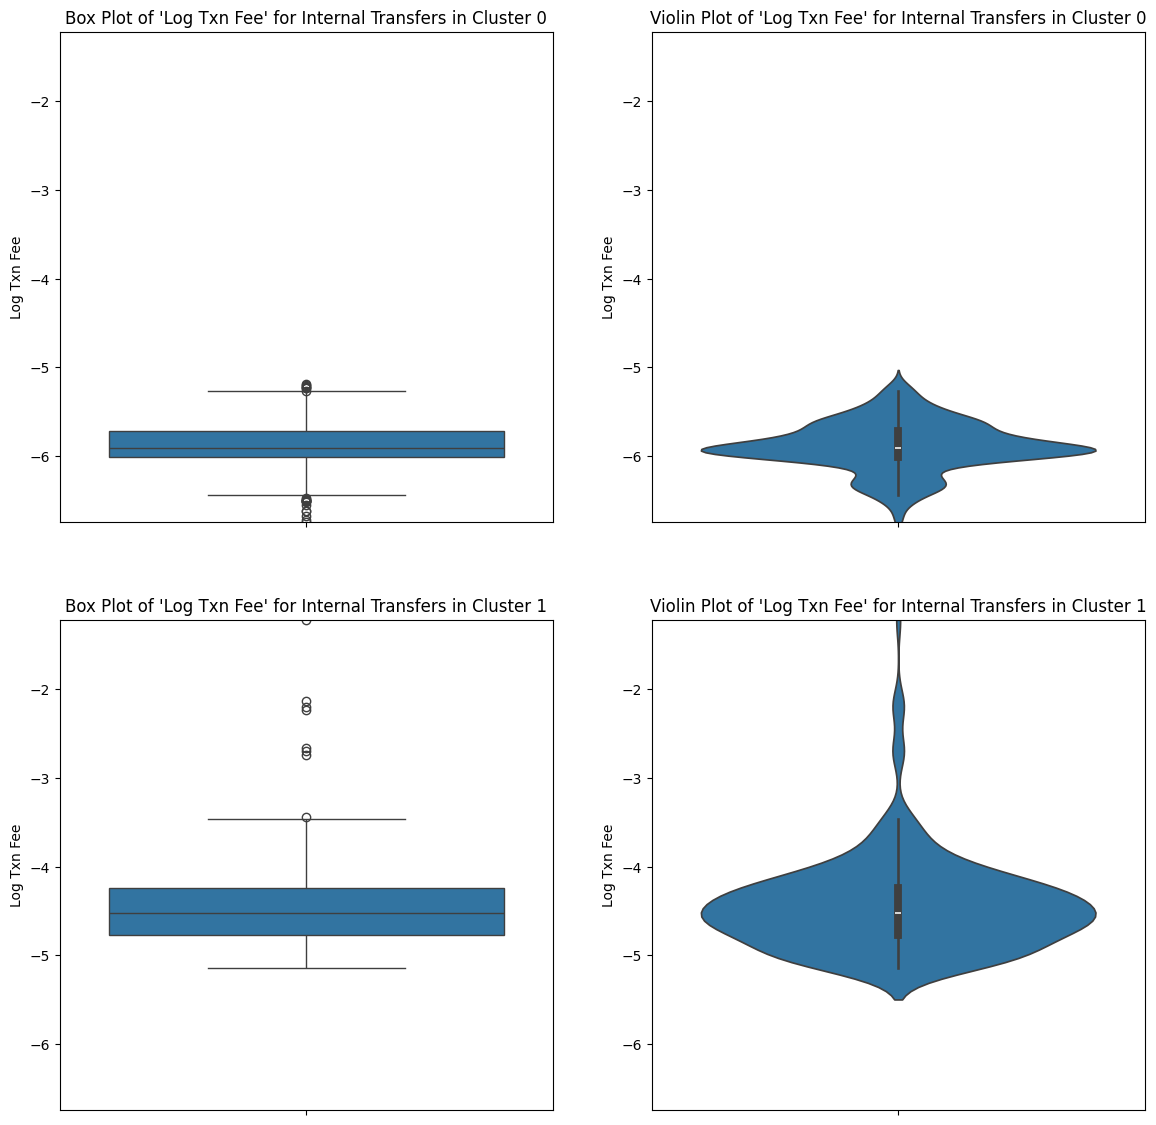

In [30]:
ymin, ymax = internal_tx_df['Log Txn Fee'].min(), internal_tx_df['Log Txn Fee'].max()
plt.figure(figsize=(14, 14))
plot_violin_and_box_plots_for_clusters(internal_tx_c0_df, \
                                       internal_tx_c1_df, \
                                       'Log Txn Fee', \
                                       ylim=(ymin, ymax), \
                                       titles=[ \
                                           "Box Plot of 'Log Txn Fee' for Internal Transfers in Cluster 0", \
                                           "Violin Plot of 'Log Txn Fee' for Internal Transfers in Cluster 0", \
                                           "Box Plot of 'Log Txn Fee' for Internal Transfers in Cluster 1", \
                                           "Violin Plot of 'Log Txn Fee' for Internal Transfers in Cluster 1" \
                                       ])
plt.show()

#### External Transfers

##### Transaction Fee

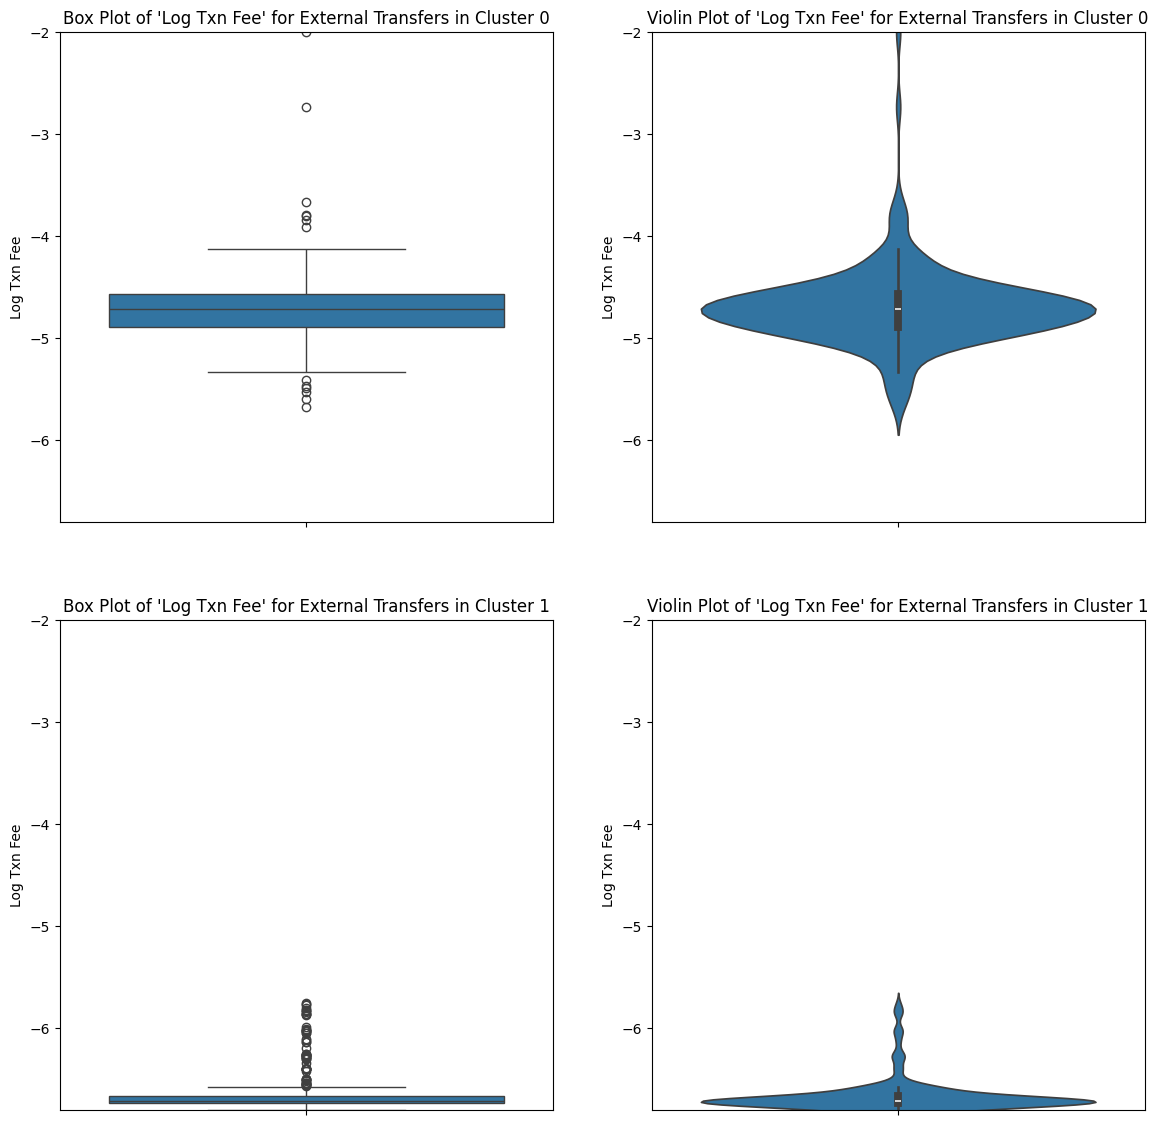

In [31]:
ymin, ymax = external_tx_df['Log Txn Fee'].min(), external_tx_df['Log Txn Fee'].max()
plt.figure(figsize=(14, 14))
plot_violin_and_box_plots_for_clusters(external_tx_c0_df, \
                                       external_tx_c1_df, \
                                       'Log Txn Fee', \
                                       ylim=(ymin, ymax), \
                                       titles=[ \
                                           "Box Plot of 'Log Txn Fee' for External Transfers in Cluster 0", \
                                           "Violin Plot of 'Log Txn Fee' for External Transfers in Cluster 0", \
                                           "Box Plot of 'Log Txn Fee' for External Transfers in Cluster 1", \
                                           "Violin Plot of 'Log Txn Fee' for External Transfers in Cluster 1" \
                                       ])
plt.show()

##### Value

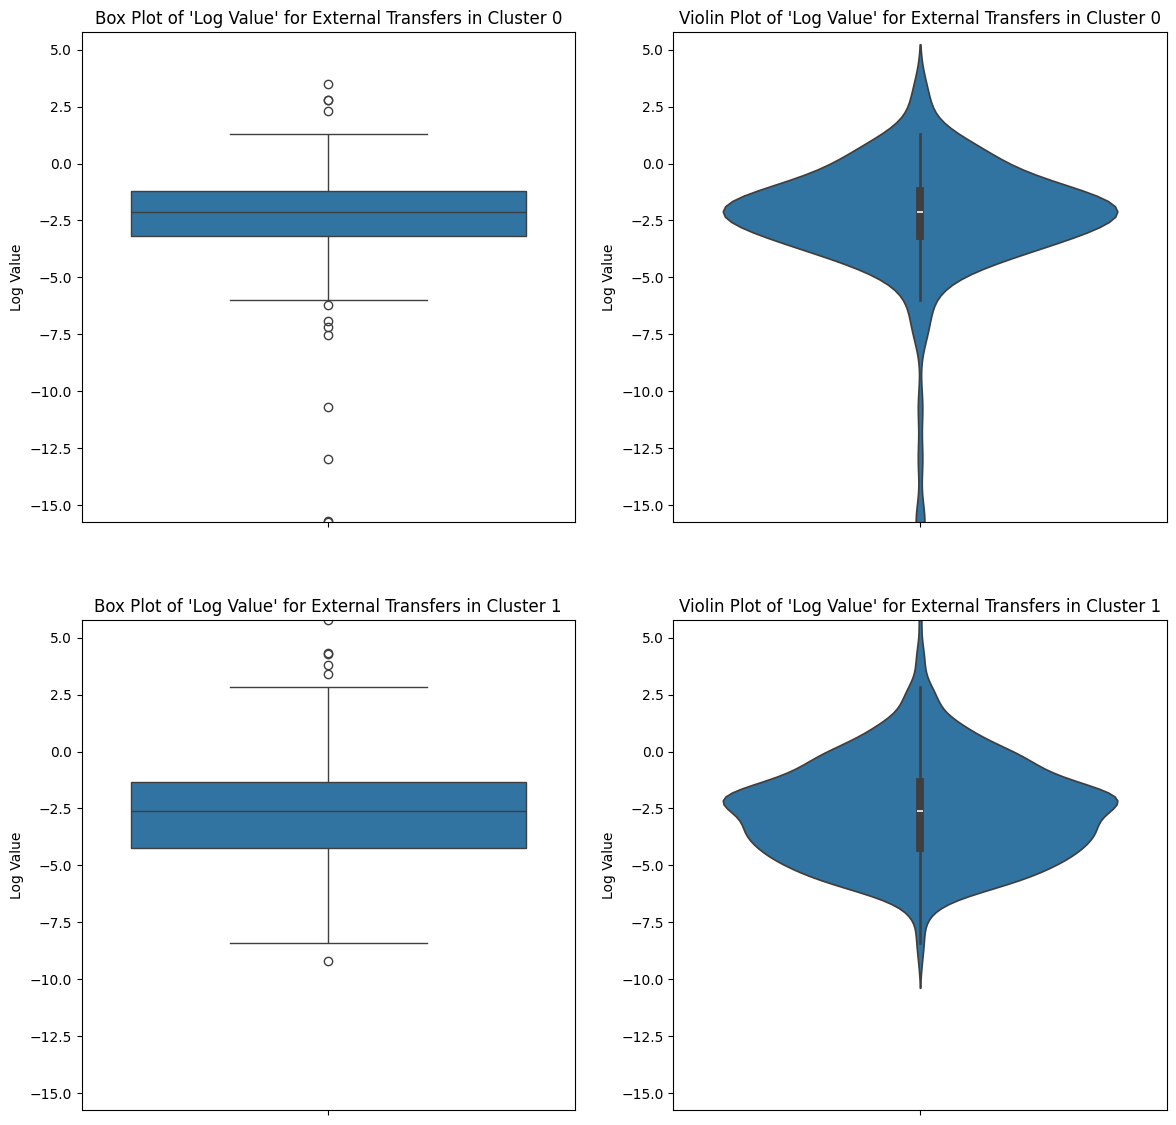

In [32]:
ymin, ymax = external_tx_df['Log Value'].min(), external_tx_df['Log Value'].max()
plt.figure(figsize=(14, 14))
plot_violin_and_box_plots_for_clusters(external_tx_c0_df, \
                                       external_tx_c1_df, \
                                       'Log Value', \
                                       ylim=(ymin, ymax), \
                                       titles=[ \
                                           "Box Plot of 'Log Value' for External Transfers in Cluster 0", \
                                           "Violin Plot of 'Log Value' for External Transfers in Cluster 0", \
                                           "Box Plot of 'Log Value' for External Transfers in Cluster 1", \
                                           "Violin Plot of 'Log Value' for External Transfers in Cluster 1" \
                                       ])
plt.show()

### Removing Outliers

In [33]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))

    return df[~outliers]

In [34]:
external_tx_c0_df_no_outliers = remove_outliers(external_tx_c0_df, 'Log Txn Fee')
external_tx_c0_df_no_outliers.to_csv('data/external_transfers_cluster0_without_outliers.csv', index=False)

external_tx_c1_df_no_outliers = remove_outliers(external_tx_c1_df, 'Log Txn Fee')
external_tx_c1_df_no_outliers.to_csv('data/external_transfers_cluster1_without_outliers.csv', index=False)

In [35]:
internal_tx_c0_df_no_outliers = remove_outliers(internal_tx_c0_df, 'Log Txn Fee')
internal_tx_c0_df_no_outliers.to_csv('data/internal_transfers_cluster0_without_outliers.csv', index=False)

internal_tx_c1_df_no_outliers = remove_outliers(internal_tx_c1_df, 'Log Txn Fee')
internal_tx_c1_df_no_outliers.to_csv('data/internal_transfers_cluster1_without_outliers.csv', index=False)

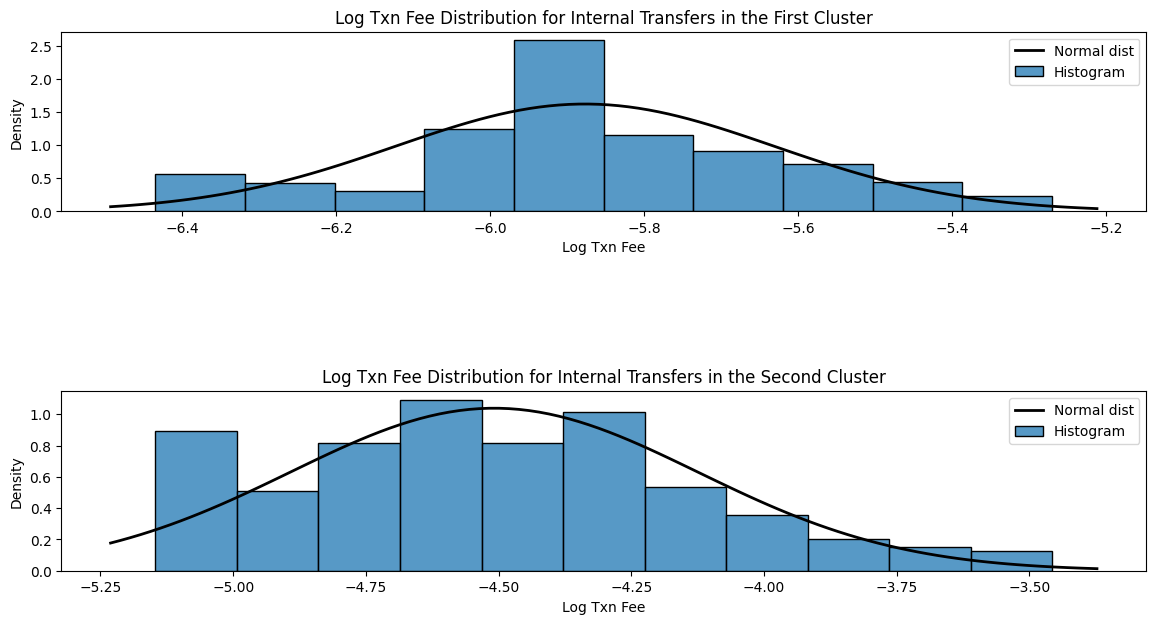

In [36]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plot_histogram_and_normal_dist(internal_tx_c0_df_no_outliers, 'Log Txn Fee', title='Log Txn Fee Distribution for Internal Transfers in the First Cluster', bin_size=10)

plt.subplot(2, 1, 2)
plot_histogram_and_normal_dist(internal_tx_c1_df_no_outliers, 'Log Txn Fee', title='Log Txn Fee Distribution for Internal Transfers in the Second Cluster')
plt.subplots_adjust(hspace=1)
plt.show()

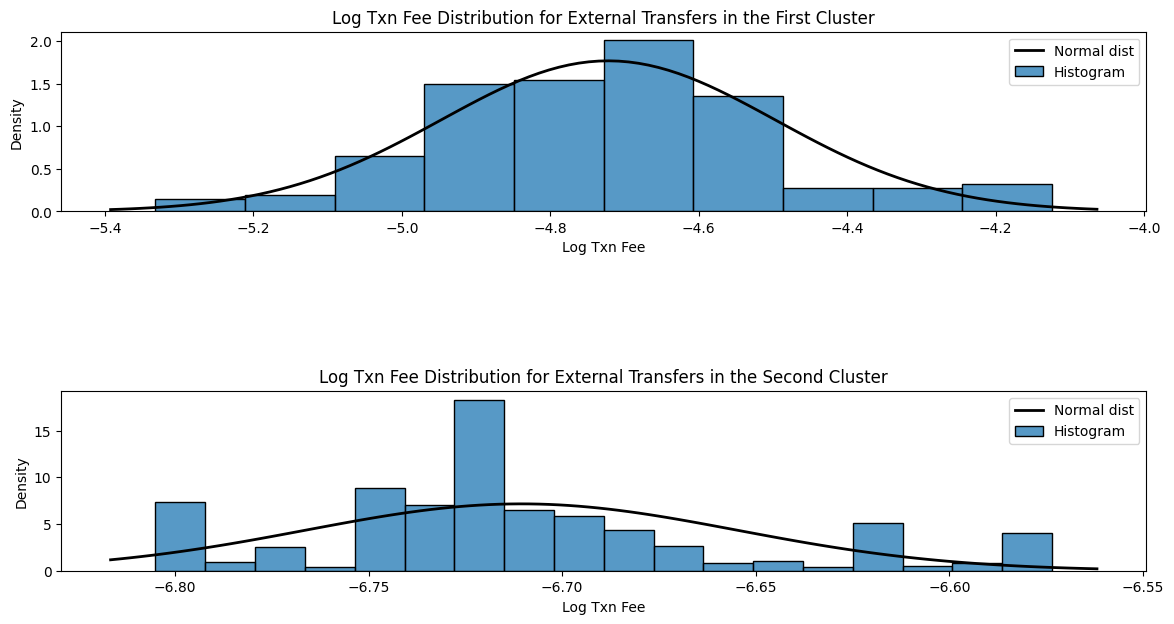

In [37]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plot_histogram_and_normal_dist(external_tx_c0_df_no_outliers, 'Log Txn Fee', title='Log Txn Fee Distribution for External Transfers in the First Cluster', bin_size=10)

plt.subplot(2, 1, 2)
plot_histogram_and_normal_dist(external_tx_c1_df_no_outliers, 'Log Txn Fee', title='Log Txn Fee Distribution for External Transfers in the Second Cluster')
plt.subplots_adjust(hspace=1)
plt.show()

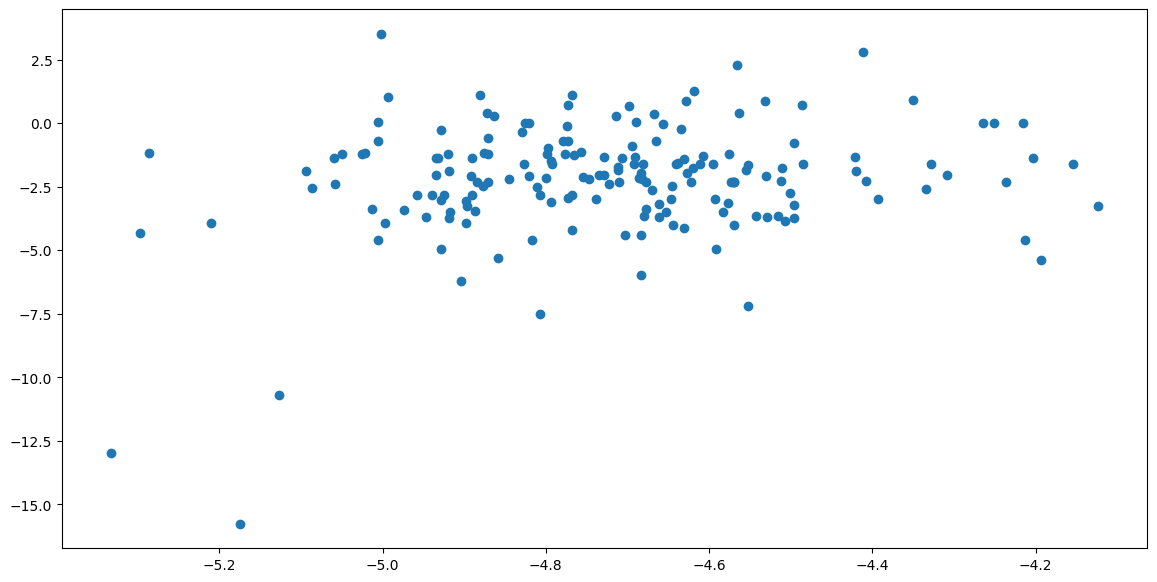

correlation of X with Y = 0.21041571103689813


In [38]:
X = external_tx_c0_df_no_outliers['Log Txn Fee']
Y = external_tx_c0_df_no_outliers['Log Value']

plt.figure(figsize=(14, 7))
plt.scatter(X, Y)
plt.show()
print(f"correlation of X with Y = {X.corr(Y)}")

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

## Sampling:

#### Define Sampling Size:

In [39]:
def calculate_sample_size(N, sigma, E, confidence_level):
    alpha = 1 - confidence_level
    Z = norm.ppf(1 - alpha/2)  # Z-score from the normal distribution
    numerator = N * (Z**2) * (sigma**2)
    denominator = (E**2) * (N-1) + (Z**2) * (sigma**2)
    sample_size = numerator / denominator
    return round(sample_size)

In [40]:
sample_size_value = calculate_sample_size(len(df), value_std, 0.25, 0.95)
sample_size_fee = calculate_sample_size(len(df), txn_fee_std, 0.001, 0.99)
sample_size = max(sample_size_value, sample_size_fee)

#### Simple Random Sampling

In [47]:
if df.empty:
    print("The DataFrame is empty.")
if len(df) < sample_size:
    print(f"Cannot sample {sample_size} rows from a DataFrame with only {len(df)} rows.")
else:
    SRS_samples = df.sample(n = sample_size)
    print("Sampled successfully. (for value)")

print(f"sample size: {sample_size}")

Sampled successfully. (for value)
sample size: 1198


In [48]:
SRS_samples

,Block,Value,Txn Fee
Method,,,
Transfer,19386321,0.013000,0.001180
Approve,19386315,0.000000,0.002643
Transfer,19386316,0.003269,0.001204
Transfer,19386321,0.003036,0.001201
0x00000002,19386321,0.000000,0.006335
...,...,...,...
Transfer,19386322,0.000000,0.003126
Transfer,19386318,0.000000,0.004015
Transfer,19386320,0.045000,0.001108


#### Stratified Sampling

In [49]:
stratified_samples = df.groupby('Block', group_keys=False).apply(lambda x: x.sample(round(len(x) * sample_size / len(df))))

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\2533079192.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_samples = df.groupby('Block', group_keys=False).apply(lambda x: x.sample(round(len(x) * sample_size / len(df))))


In [50]:
stratified_samples

,Block,Value,Txn Fee
Method,,,
Execute,19386313,0.250,0.006347
Transfer,19386313,0.130,0.001205
Transfer,19386313,0.024,0.001205
Approve,19386313,0.000,0.002674
Confirm Data,19386313,0.000,0.016436
...,...,...,...
Transfer,19386322,0.005,0.001168
Bond Withdrawal,19386322,0.000,0.006431
Transfer,19386322,0.000,0.002934


## Statistical Analysis:

#### Simple Random Sampling

In [51]:
SRS_txn_fee_mean = SRS_samples['Txn Fee'].mean()
SRS_txn_fee_std = SRS_samples['Txn Fee'].std()

SRS_value_mean = SRS_samples['Value'].mean()
SRS_value_std = SRS_samples['Value'].std()

print("Simple Random Sampling:")
print(f"Txn Fee Mean: {SRS_txn_fee_mean}, Standard Deviation: {SRS_txn_fee_std}")
print(f"Value Mean: {SRS_value_mean}, Standard Deviation: {SRS_value_std}")

Simple Random Sampling:
Txn Fee Mean: 0.005230917687813022, Standard Deviation: 0.011723478279835525
Value Mean: 0.7798807947671119, Standard Deviation: 10.01899099489197


#### Stratified Sampling

In [54]:
stratified_txn_fee_mean = stratified_samples['Txn Fee'].mean()
straified_txn_fee_std = stratified_samples['Txn Fee'].std()

stratified_value_mean = stratified_samples['Value'].mean()
stratified_value_std = stratified_samples['Value'].std()

print("Stratified Random Sampling:")
print(f"stratified: Txn Fee Mean: {stratified_txn_fee_mean}, Standard Deviation: {stratified_txn_fee_mean}")
print(f"stratified: Value Mean: {stratified_value_mean}, Standard Deviation: {straified_txn_fee_std}")


Stratified Random Sampling:
stratified: Txn Fee Mean: 0.005164665572263994, Standard Deviation: 0.005164665572263994
stratified: Value Mean: 0.36772512464995827, Standard Deviation: 0.011516433230750587


#### Without Sampling

In [55]:
print("Without Sampling:")
print(f"Txn Fee Mean: {txn_fee_mean}, Standard Deviation: {txn_fee_std}")
print(f"Value Mean: {value_mean}, Standard Deviation: {value_std}")

Without Sampling:
Txn Fee Mean: 0.005059634024615385, Standard Deviation: 0.01076051739714995
Value Mean: 0.628424691616, Standard Deviation: 8.61394923792629


## Visualization

#### Simple Random Sampling

###### Adding Logarithm Columns

In [56]:
SRS_internal_tx_df = SRS_samples[SRS_samples['Value'] == 0]
SRS_external_tx_df = SRS_samples[SRS_samples['Value'] != 0]

In [57]:
SRS_internal_tx_df.loc[:, 'Log Txn Fee'] = np.log(SRS_internal_tx_df['Txn Fee'])

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\3645670737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRS_internal_tx_df.loc[:, 'Log Txn Fee'] = np.log(SRS_internal_tx_df['Txn Fee'])


In [58]:
SRS_external_tx_df.loc[:, 'Log Txn Fee'] = np.log(SRS_external_tx_df['Txn Fee'])
SRS_external_tx_df.loc[:, 'Log Value'] = np.log(SRS_external_tx_df['Value'])

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\3072578754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRS_external_tx_df.loc[:, 'Log Txn Fee'] = np.log(SRS_external_tx_df['Txn Fee'])
C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\3072578754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRS_external_tx_df.loc[:, 'Log Value'] = np.log(SRS_external_tx_df['Value'])


#### Information About Dataframes

In [59]:
SRS_internal_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, Approve to Transfer
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Block        592 non-null    int64  
 1   Value        592 non-null    float64
 2   Txn Fee      592 non-null    float64
 3   Log Txn Fee  592 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 23.1+ KB


In [60]:
SRS_external_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, Transfer to Execute
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Block        606 non-null    int64  
 1   Value        606 non-null    float64
 2   Txn Fee      606 non-null    float64
 3   Log Txn Fee  606 non-null    float64
 4   Log Value    606 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 28.4+ KB


#### Plotting Histograms and the Fitted Normal Distribution

##### Internal Transfers

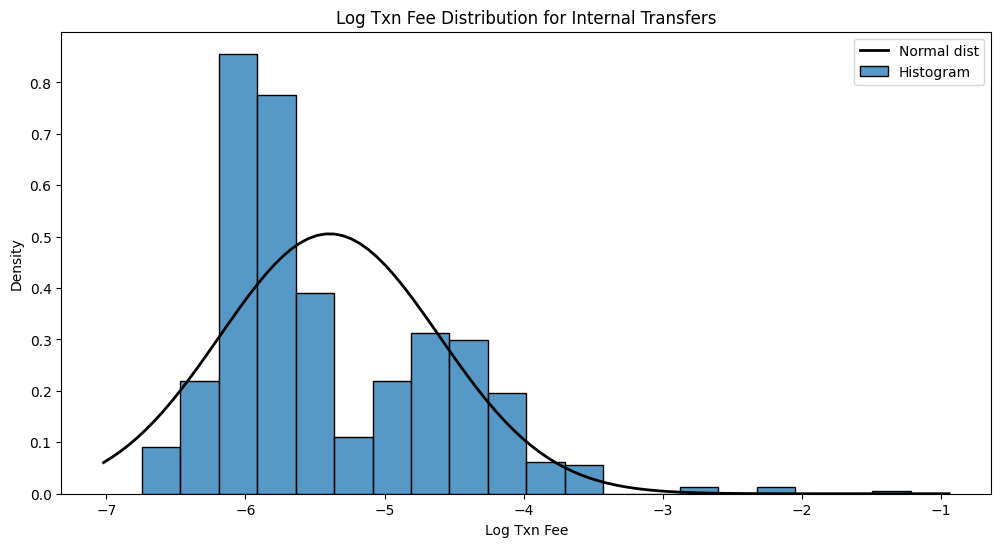

In [61]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plot_histogram_and_normal_dist(SRS_internal_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for Internal Transfers')
plt.show()

##### External Transfers

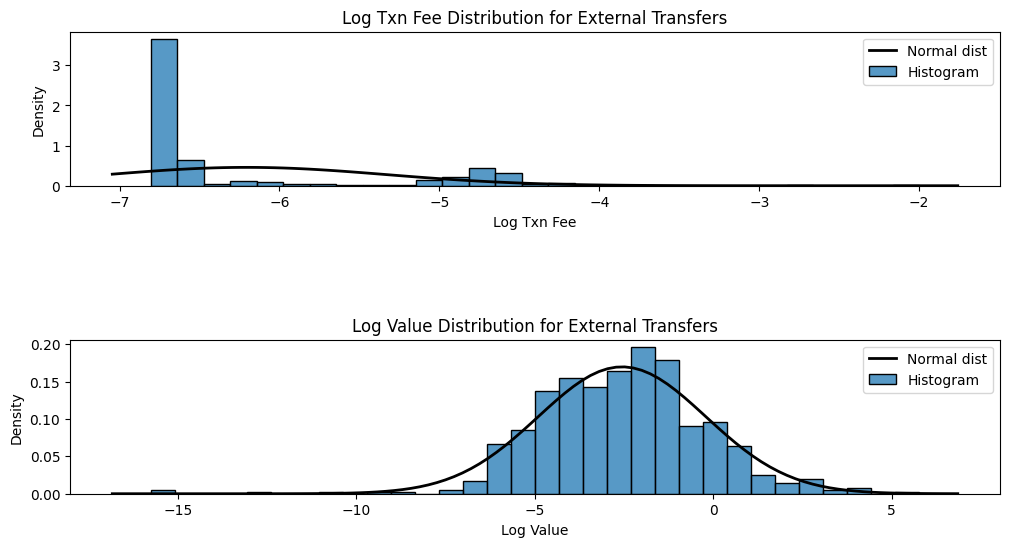

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_histogram_and_normal_dist(SRS_external_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for External Transfers')

plt.subplot(2, 1, 2)
plot_histogram_and_normal_dist(SRS_external_tx_df, 'Log Value', title='Log Value Distribution for External Transfers')

plt.subplots_adjust(hspace=1)
plt.show()

##### Violin and Box Plots 

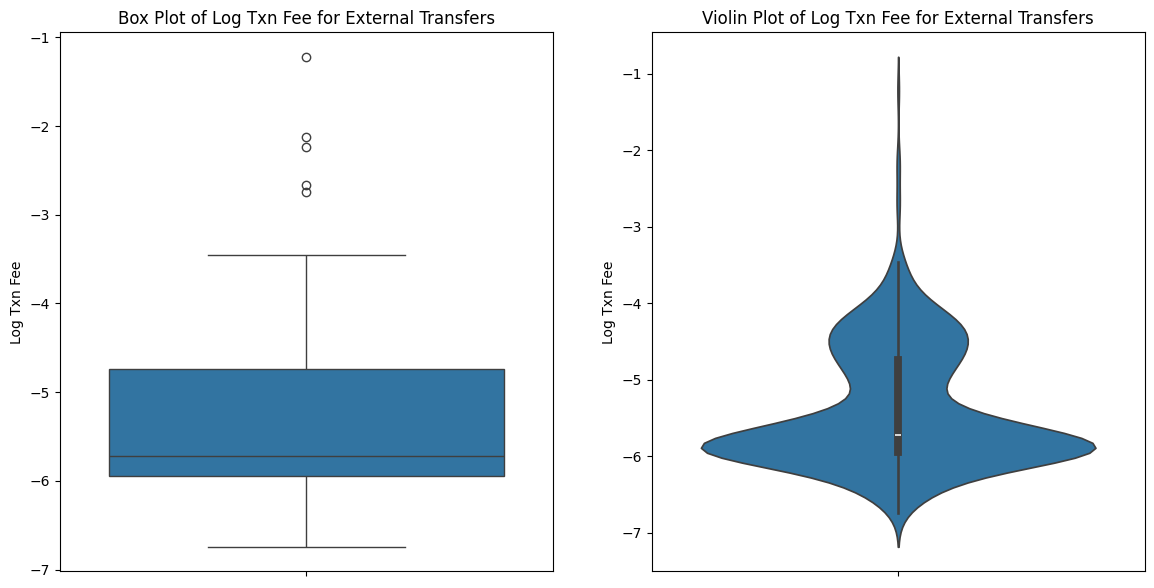

In [63]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=SRS_internal_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=SRS_internal_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

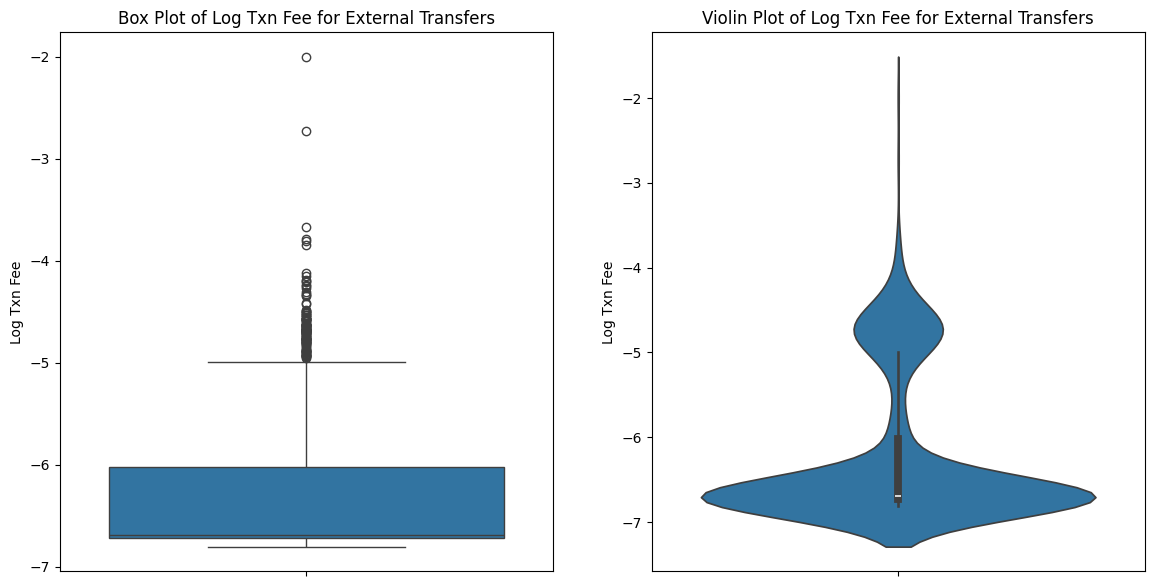

In [64]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=SRS_external_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=SRS_external_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

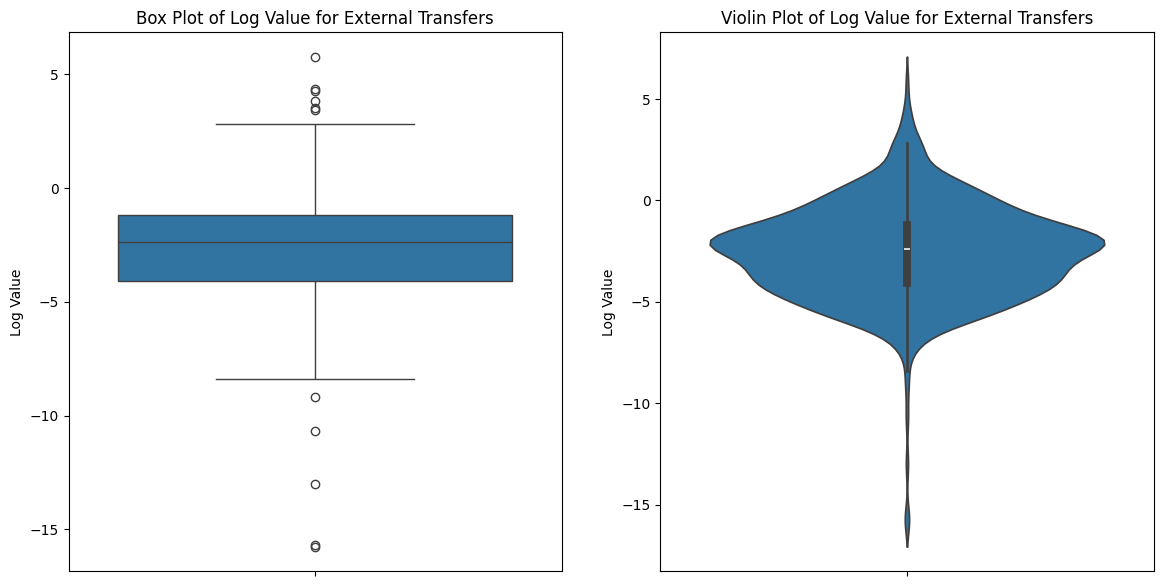

In [65]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=SRS_external_tx_df, y='Log Value')
plt.title('Box Plot of Log Value for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=SRS_external_tx_df, y='Log Value')
plt.title('Violin Plot of Log Value for External Transfers')

plt.show()

##### Clustering Transaction Fees Using K-Means

In [66]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5)
kmeans.fit(SRS_external_tx_df[['Log Txn Fee']].values)
SRS_external_tx_df.loc[:, 'Cluster Label'] = kmeans.labels_

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\3981393726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRS_external_tx_df.loc[:, 'Cluster Label'] = kmeans.labels_


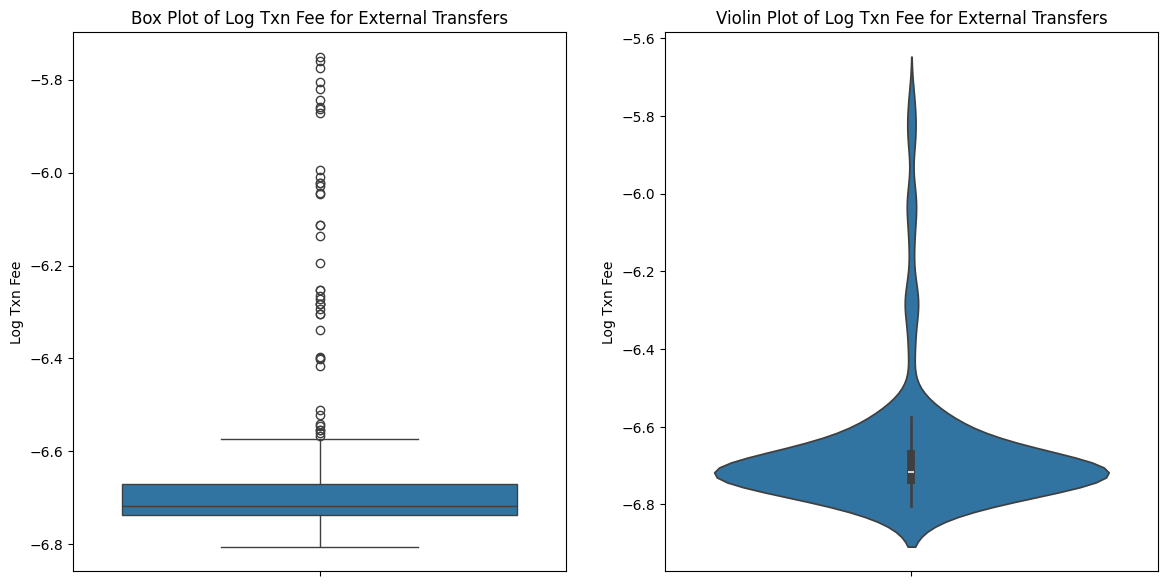

In [67]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=SRS_external_tx_df[SRS_external_tx_df['Cluster Label'] == 0], y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=SRS_external_tx_df[SRS_external_tx_df['Cluster Label'] == 0], y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

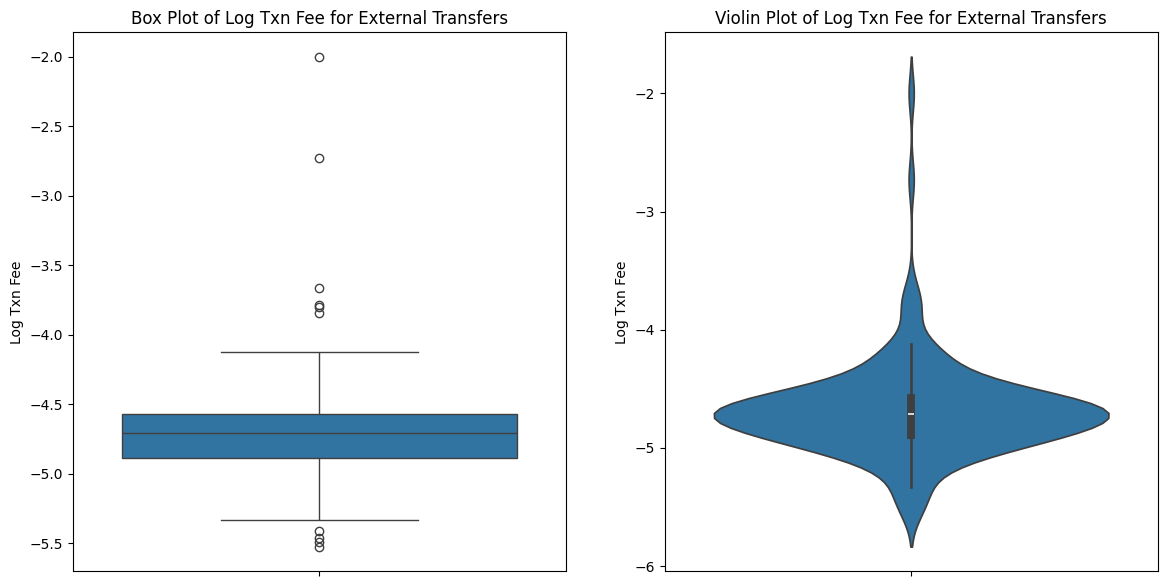

In [68]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=SRS_external_tx_df[SRS_external_tx_df['Cluster Label'] == 1], y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=SRS_external_tx_df[SRS_external_tx_df['Cluster Label'] == 1], y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

#### Stratified Sampling

###### Adding Logarithm Columns

In [69]:
stratified_internal_tx_df = stratified_samples[stratified_samples['Value'] == 0]
stratified_external_tx_df = stratified_samples[stratified_samples['Value'] != 0]

In [70]:
stratified_internal_tx_df.loc[:, 'Log Txn Fee'] = np.log(stratified_internal_tx_df['Txn Fee'])

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\2513317875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stratified_internal_tx_df.loc[:, 'Log Txn Fee'] = np.log(stratified_internal_tx_df['Txn Fee'])


In [71]:
stratified_external_tx_df.loc[:, 'Log Txn Fee'] = np.log(stratified_external_tx_df['Txn Fee'])
stratified_external_tx_df.loc[:, 'Log Value'] = np.log(stratified_external_tx_df['Value'])

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\4259952494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stratified_external_tx_df.loc[:, 'Log Txn Fee'] = np.log(stratified_external_tx_df['Txn Fee'])
C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\4259952494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stratified_external_tx_df.loc[:, 'Log Value'] = np.log(stratified_external_tx_df['Value'])


#### Information About Dataframes

In [72]:
stratified_internal_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, Approve to Approve
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Block        586 non-null    int64  
 1   Value        586 non-null    float64
 2   Txn Fee      586 non-null    float64
 3   Log Txn Fee  586 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 22.9+ KB


In [73]:
stratified_external_tx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, Execute to Transfer
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Block        611 non-null    int64  
 1   Value        611 non-null    float64
 2   Txn Fee      611 non-null    float64
 3   Log Txn Fee  611 non-null    float64
 4   Log Value    611 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 28.6+ KB


#### Plotting Histograms and the Fitted Normal Distribution

##### Internal Transfers

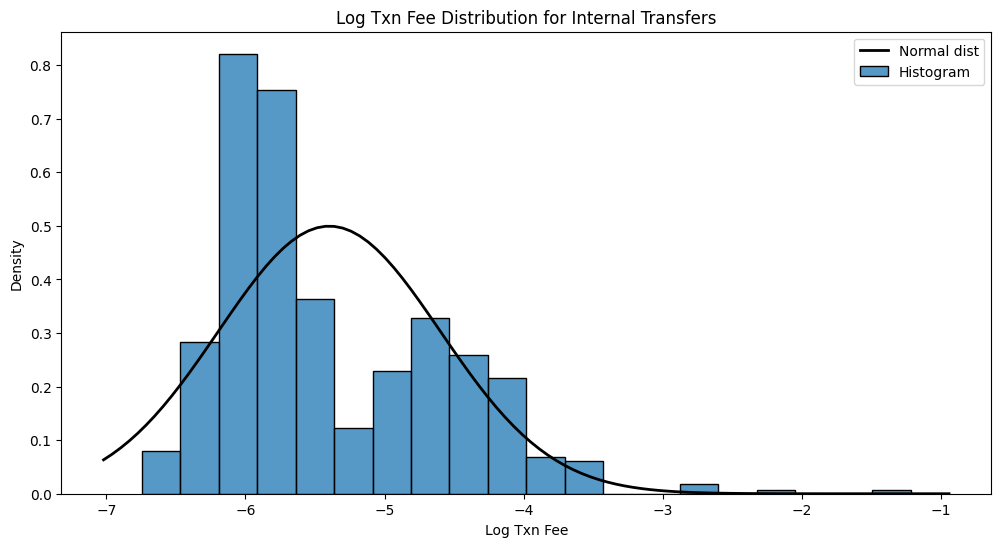

In [74]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plot_histogram_and_normal_dist(stratified_internal_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for Internal Transfers')
plt.show()

##### External Transfers

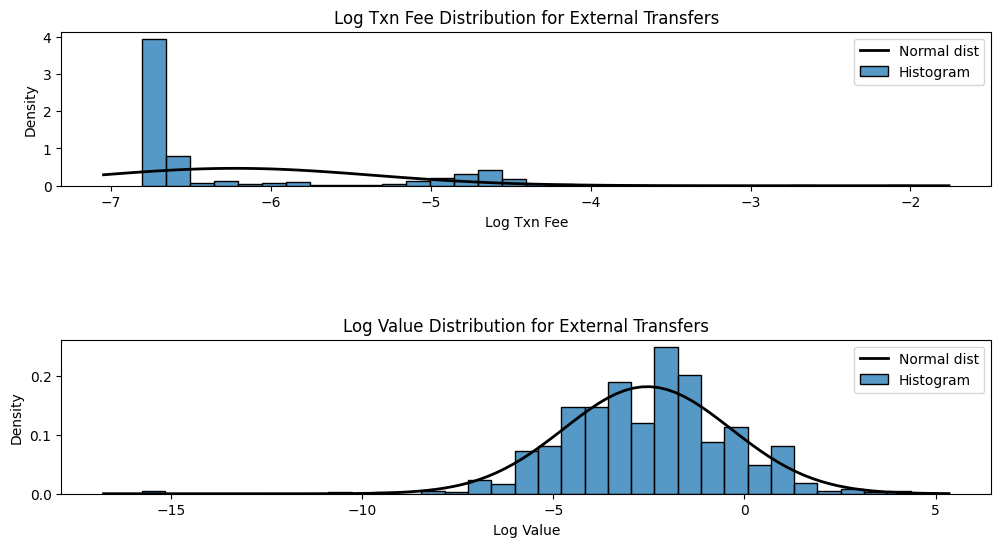

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_histogram_and_normal_dist(stratified_external_tx_df, 'Log Txn Fee', title='Log Txn Fee Distribution for External Transfers')

plt.subplot(2, 1, 2)
plot_histogram_and_normal_dist(stratified_external_tx_df, 'Log Value', title='Log Value Distribution for External Transfers')

plt.subplots_adjust(hspace=1)
plt.show()

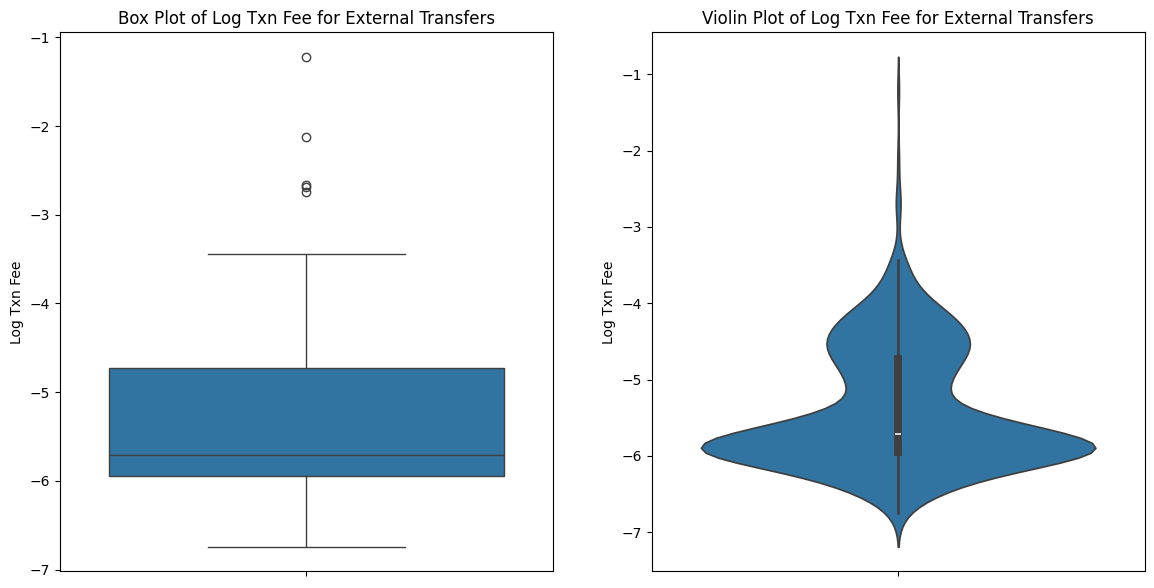

In [76]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=stratified_internal_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=stratified_internal_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

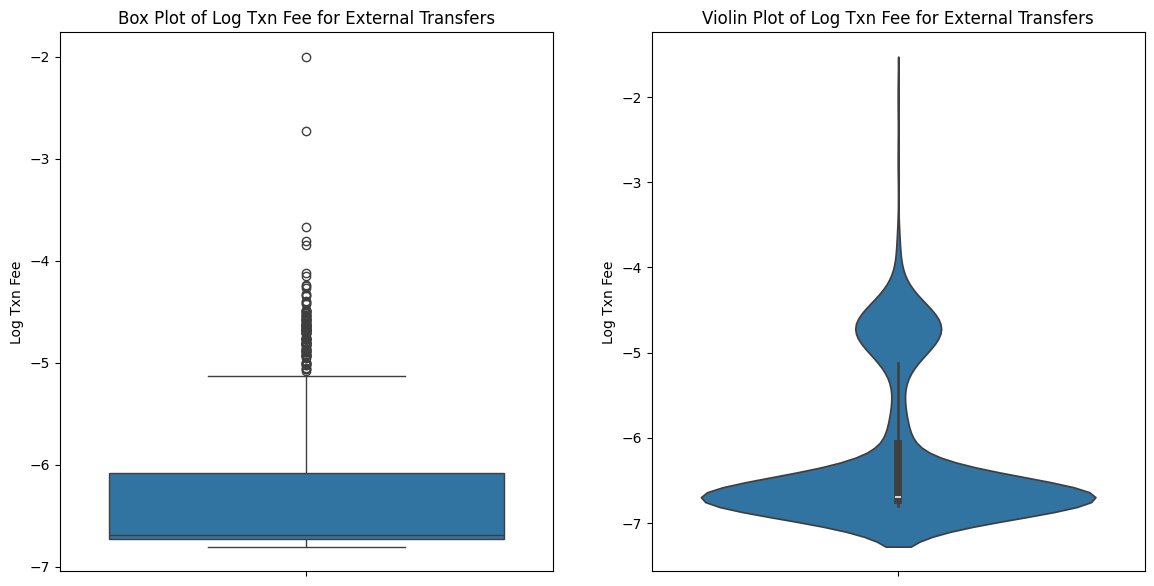

In [77]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=stratified_external_tx_df, y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=stratified_external_tx_df, y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

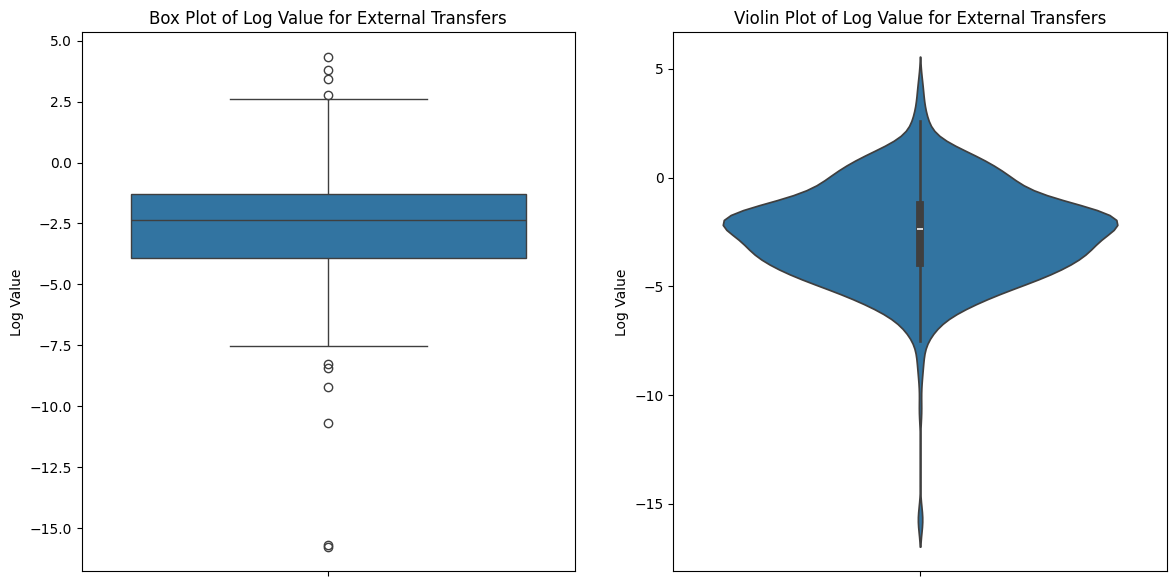

In [78]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=stratified_external_tx_df, y='Log Value')
plt.title('Box Plot of Log Value for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=stratified_external_tx_df, y='Log Value')
plt.title('Violin Plot of Log Value for External Transfers')

plt.show()

##### Clustering Transaction Fees Using K-Means

In [79]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5)
kmeans.fit(stratified_external_tx_df[['Log Txn Fee']].values)
stratified_external_tx_df.loc[:, 'Cluster Label'] = kmeans.labels_

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_18880\39586961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stratified_external_tx_df.loc[:, 'Cluster Label'] = kmeans.labels_


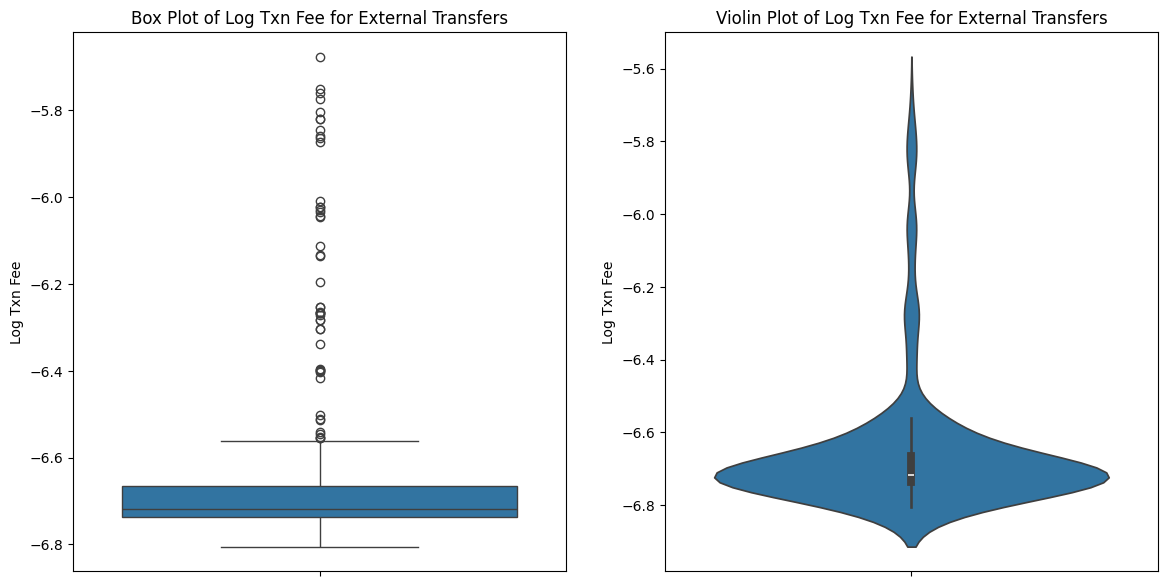

In [80]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=stratified_external_tx_df[stratified_external_tx_df['Cluster Label'] == 0], y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=stratified_external_tx_df[stratified_external_tx_df['Cluster Label'] == 0], y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()

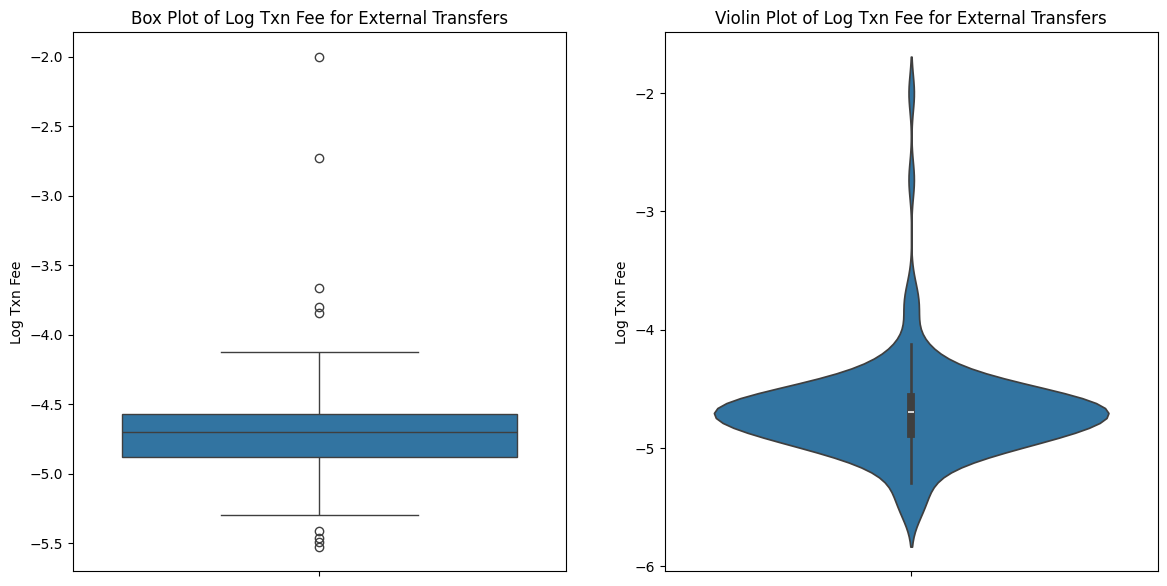

In [81]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=stratified_external_tx_df[stratified_external_tx_df['Cluster Label'] == 1], y='Log Txn Fee')
plt.title('Box Plot of Log Txn Fee for External Transfers')

plt.subplot(1, 2, 2)
sns.violinplot(data=stratified_external_tx_df[stratified_external_tx_df['Cluster Label'] == 1], y='Log Txn Fee')
plt.title('Violin Plot of Log Txn Fee for External Transfers')

plt.show()